In [48]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

dataset = pd.read_csv('features.csv')
names = ['authorID', 'spCount','hastags','word_count','char_count','isCapitalize']
X = dataset.iloc[:, 2:].values
y = dataset.iloc[:,1].values
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
#dummy_y = np_utils.to_categorical(encoded_Y)
dummy_y=encoded_Y
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size=0.20,random_state=42)
model = Sequential()
model.add(Dense(32, input_dim=5, activation='relu')) # input dimension = dimension of festure vector
model.add(Dense(8, activation='relu'))
model.add(Dense(10000, activation='softmax')) # output layer = no. of classes
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
train_histt = model.fit(X_train, y_train, epochs=10, batch_size=512, verbose=1)





ValueError: Error when checking target: expected dense_39 to have shape (10000,) but got array with shape (1,)

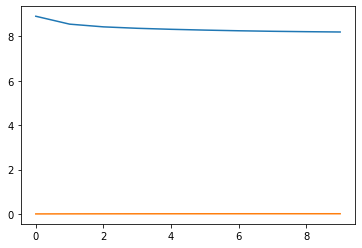

In [46]:
import matplotlib.pyplot as plt
plt.plot(train_histt.history['loss'])
plt.plot(train_histt.history['acc'])
plt.show()



In [47]:
scores = model.evaluate(X_test, y_test, batch_size=32)
print('Test loss=%s'% scores[0])
print('Test accuracy=%s'% scores[1])

65639/65639 [==============================] - 11s 172us/step
Test loss=8.35606016764252
Test accuracy=0.010115937171498652
